In [1]:
import pandas as pd
import glob


In [2]:
csv_file_paths = [
    'Ali work/RM038-2021-2.csv',
    'Ali work/RM041-2021-4.csv',
    'Ali work/RM166-2021-4.csv',
    'Ali work/RM168-2021-4.csv','Ali work/RM169-2021-5.csv','Ali work/RM173-2021-2.csv'
]

In [3]:
csv_dfs = [pd.read_csv(file) for file in csv_file_paths]

# Convert the list of DataFrames into a single DataFrame
combined_csv_df = pd.concat(csv_dfs, ignore_index=True)

# Display the combined DataFrame
combined_csv_df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Ali work/RM038-2021-2.csv'

In [4]:
csv_file_paths = [
    'Ali work/RM038-2021-2.csv'.strip(),
    'Ali work/RM041-2021-4.csv'.strip(),
    'Ali work/RM166-2021-4.csv'.strip(),
    'Ali work/RM169-2021-5.csv'.strip(),
    'Ali work/RM168-2021-4.csv'.strip()
]

In [5]:
csv_dfs = [pd.read_csv(file) for file in csv_file_paths]

# Convert the list of DataFrames into a single DataFrame
combined_csv_df = pd.concat(csv_dfs, ignore_index=True)

# Display the combined DataFrame
combined_csv_df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Ali work/RM038-2021-2.csv'

In [7]:
#  csv_dfs = [pd.read_csv(file) for file in csv_file_paths]

# Read the Excel file
excel_df = pd.read_excel('/content/Master Dastaset.xlsx', sheet_name='Sheet1')  # Specify sheet_name if needed

#Combine all DataFrames (CSV + Excel) into one
excel_df

# Display the combined DataFrame


,Lower tier local authorities Code,Lower tier local authorities,Gender identity (4 categories) Code,Gender identity (4 categories),Economic activity status (10 categories) Code,Economic activity status (10 categories),Marital and civil partnership status (7 categories) Code,Marital and civil partnership status (7 categories),Type of central heating in household (3 categories) Code,Type of central heating in household (3 categories),Highest level of qualification (8 categories) Code,Highest level of qualification (8 categories),National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code,National Statistics Socio-economic Classification (NS-SeC) (10 categories),Unpaid care (5 categories) Code,Unpaid care (5 categories)
0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,-8,Does not apply,-9.0,Does not apply,-8,Does not apply,-8,Does not apply,-8.0,Does not apply
1,E06000001,Hartlepool,-8,Does not apply,1,Economically active (excluding full-time stude...,1,Never married and never registered a civil par...,1.0,Does not have central heating,0,No qualifications,1,"L1, L2 and L3: Higher managerial, administrati...",1.0,Provides no unpaid care
2,E06000001,Hartlepool,-8,Does not apply,2,Economically active (excluding full-time stude...,2,Married,2.0,Does have central heating,1,Level 1 and entry level qualifications: 1 to 4...,2,"L4, L5 and L6: Lower managerial, administrativ...",2.0,Provides 19 or less hours unpaid care a week
3,E06000001,Hartlepool,-8,Does not apply,3,Economically active and a full-time student: I...,3,In a registered civil partnership,-9.0,Does not apply,2,Level 2 qualifications: 5 or more GCSEs (A* to...,3,L7: Intermediate occupations,3.0,Provides 20 to 49 hours unpaid care a week
4,E06000001,Hartlepool,-8,Does not apply,4,Economically active and a full-time student: U...,4,"Separated, but still legally married or still ...",1.0,Does not have central heating,3,Apprenticeship,4,L8 and L9: Small employers and own account wor...,4.0,Provides 50 or more hours unpaid care a week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13233,W06000024,Merthyr Tydfil,3,Not answered,3,Economically active and a full-time student: I...,3,In a registered civil partnership,NaN,NaN,0,No qualifications,3,L7: Intermediate occupations,NaN,NaN
13234,W06000024,Merthyr Tydfil,3,Not answered,4,Economically active and a full-time student: U...,4,"Separated, but still legally married or still ...",NaN,NaN,1,Level 1 and entry level qualifications: 1 to 4...,4,L8 and L9: Small employers and own account wor...,NaN,NaN
13235,W06000024,Merthyr Tydfil,3,Not answered,5,Economically inactive: Retired,5,Divorced or formerly in a civil partnership wh...,NaN,NaN,2,Level 2 qualifications: 5 or more GCSEs (A* to...,5,L10 and L11: Lower supervisory and technical o...,NaN,NaN
13236,W06000024,Merthyr Tydfil,3,Not answered,6,Economically inactive: Student,6,Widowed or surviving partner from a civil part...,NaN,NaN,3,Apprenticeship,6,L12: Semi-routine occupations,NaN,NaN


In [8]:
ethnic_group_data = combined_csv_df[['Lower tier local authorities Code',
                         'Ethnic group (8 categories) Code',
                         'Ethnic group (8 categories)']]

# Merge df2 with the subsetted ethnic_group_data on 'Lower tier local authorities Code'
merged_df = pd.merge(excel_df, ethnic_group_data, on='Lower tier local authorities Code', how='left')

# Check the result
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163882 entries, 0 to 3163881
Data columns (total 18 columns):
 #   Column                                                                           Dtype  
---  ------                                                                           -----  
 0   Lower tier local authorities Code                                                object 
 1   Lower tier local authorities                                                     object 
 2   Gender identity (4 categories) Code                                              int64  
 3   Gender identity (4 categories)                                                   object 
 4   Economic activity status (10 categories) Code                                    int64  
 5   Economic activity status (10 categories)                                         object 
 6   Marital and civil partnership status (7 categories) Code                         int64  
 7   Marital and civil partnership status

In [9]:
# Check for NaN values in the DataFrame
nan_count = merged_df.isna().sum()  # Count of NaN values per column
nan_percentage = merged_df.isna().mean() * 100  # Percentage of NaN values per column

# Create a summary DataFrame to display the results
nan_summary = pd.DataFrame({
    'NaN Count': nan_count,
    'Percentage': nan_percentage
})

# Display the summary
print(nan_summary)

                                                    NaN Count  Percentage
Lower tier local authorities Code                           0    0.000000
Lower tier local authorities                                0    0.000000
Gender identity (4 categories) Code                         0    0.000000
Gender identity (4 categories)                              0    0.000000
Economic activity status (10 categories) Code               0    0.000000
Economic activity status (10 categories)                    0    0.000000
Marital and civil partnership status (7 categor...          0    0.000000
Marital and civil partnership status (7 categor...          0    0.000000
Type of central heating in household (3 categor...    1502593   47.492068
Type of central heating in household (3 categor...    1502593   47.492068
Highest level of qualification (8 categories) Code          0    0.000000
Highest level of qualification (8 categories)               0    0.000000
National Statistics Socio-economic Cla

In [10]:
# Drop columns with extremely high missing data percentage
merged_df = merged_df.drop(columns=[
    'Type of central heating in household (3 categories) Code',
    'Type of central heating in household (3 categories)'
])

# Fill missing values for categorical columns with the mode
merged_df['Gender identity (4 categories) Code'].fillna(excel_df['Gender identity (4 categories) Code'].mode()[0], inplace=True)
merged_df['Unpaid care (5 categories) Code'].fillna(excel_df['Unpaid care (5 categories) Code'].mode()[0], inplace=True)
merged_df['Gender identity (4 categories) Code'].fillna(excel_df['Gender identity (4 categories) Code'].mode()[0], inplace=True)

# Drop remaining rows with any missing values
df_final = merged_df.dropna()

# Verify the changes
print(df_final.isna().sum())
print(df_final.head())

Lower tier local authorities Code                                                  0
Lower tier local authorities                                                       0
Gender identity (4 categories) Code                                                0
Gender identity (4 categories)                                                     0
Economic activity status (10 categories) Code                                      0
Economic activity status (10 categories)                                           0
Marital and civil partnership status (7 categories) Code                           0
Marital and civil partnership status (7 categories)                                0
Highest level of qualification (8 categories) Code                                 0
Highest level of qualification (8 categories)                                      0
National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code    0
National Statistics Socio-economic Classification (NS-SeC) (10 ca

In [11]:
# Display the number of remaining rows in the cleaned DataFrame
df_final.shape[0]
df_cleaned = df_final.drop(columns=['Lower tier local authorities Code'])
df_cleaned.head()

,Lower tier local authorities,Gender identity (4 categories) Code,Gender identity (4 categories),Economic activity status (10 categories) Code,Economic activity status (10 categories),Marital and civil partnership status (7 categories) Code,Marital and civil partnership status (7 categories),Highest level of qualification (8 categories) Code,Highest level of qualification (8 categories),National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code,National Statistics Socio-economic Classification (NS-SeC) (10 categories),Unpaid care (5 categories) Code,Unpaid care (5 categories),Ethnic group (8 categories) Code,Ethnic group (8 categories)
0,Hartlepool,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8.0,Does not apply,-8.0,Does not apply
1,Hartlepool,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8.0,Does not apply,1.0,"Asian, Asian British or Asian Welsh"
2,Hartlepool,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8.0,Does not apply,2.0,"Black, Black British, Black Welsh, Caribbean o..."
3,Hartlepool,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8.0,Does not apply,3.0,Mixed or Multiple ethnic groups
4,Hartlepool,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8,Does not apply,-8.0,Does not apply,4.0,"White: English, Welsh, Scottish, Northern Iris..."


In [12]:
df_cleaned.shape

(370720, 15)

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370720 entries, 0 to 2768607
Data columns (total 15 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   Lower tier local authorities                                                     370720 non-null  object 
 1   Gender identity (4 categories) Code                                              370720 non-null  int64  
 2   Gender identity (4 categories)                                                   370720 non-null  object 
 3   Economic activity status (10 categories) Code                                    370720 non-null  int64  
 4   Economic activity status (10 categories)                                         370720 non-null  object 
 5   Marital and civil partnership status (7 categories) Code                         370720 non-null  int64  
 6   

In [14]:
print(df_cleaned['Gender identity (4 categories) Code'].unique())
print(df_cleaned['Economic activity status (10 categories) Code'].unique())
print(df_cleaned['Marital and civil partnership status (7 categories) Code'].unique())
print(df_cleaned['Marital and civil partnership status (7 categories) Code'].unique())
print(df_cleaned['National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'].unique())
print(df_cleaned['Unpaid care (5 categories) Code'].unique())
print(df_cleaned['Ethnic group (8 categories) Code'].unique())

# Label of code

print(df_cleaned['Gender identity (4 categories)'].unique())
print(df_cleaned['Economic activity status (10 categories)'].unique())
print(df_cleaned['Marital and civil partnership status (7 categories)'].unique())
print(df_cleaned['Marital and civil partnership status (7 categories)'].unique())
print(df_cleaned['National Statistics Socio-economic Classification (NS-SeC) (10 categories)'].unique())
print(df_cleaned['Unpaid care (5 categories)'].unique())
print(df_cleaned['Ethnic group (8 categories)'].unique())














[-8  1  2  3]
[-8  1  2  3  4  5  6  7  8  9]
[-8  1  2  3  4  5  6]
[-8  1  2  3  4  5  6]
[-8  1  2  3  4  5  6  7  8  9]
[-8.  1.  2.  3.  4.]
[-8.  1.  2.  3.  4.  5.  6.  7.]
['Does not apply' 'Gender identity the same as sex registered at birth'
 'Gender identity different from sex registered at birth' 'Not answered']
['Does not apply'
 'Economically active (excluding full-time students): In employment'
 'Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks'
 'Economically active and a full-time student: In employment'
 'Economically active and a full-time student: Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks'
 'Economically inactive: Retired' 'Economically inactive: Student'
 'Economically inactive: Looking after home or family'
 'Economically inactive: Long-term sick or disabled'
 'Economically inactive: 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

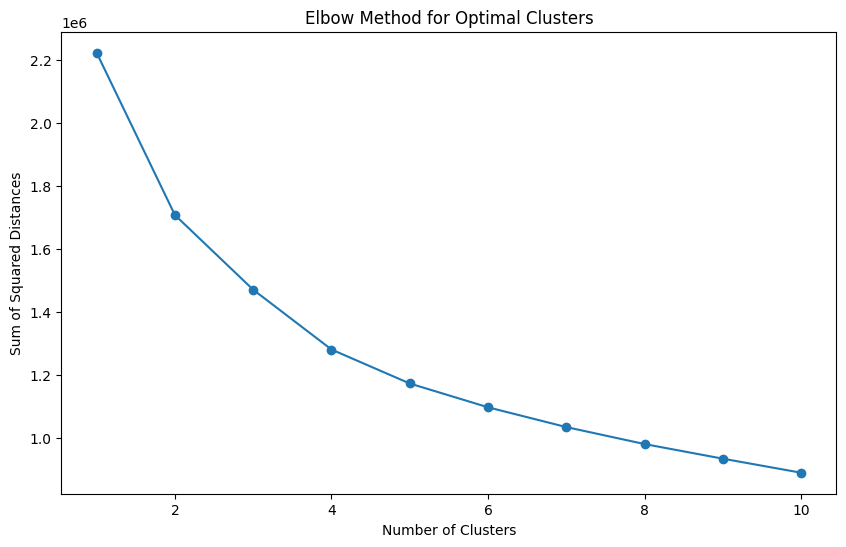

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


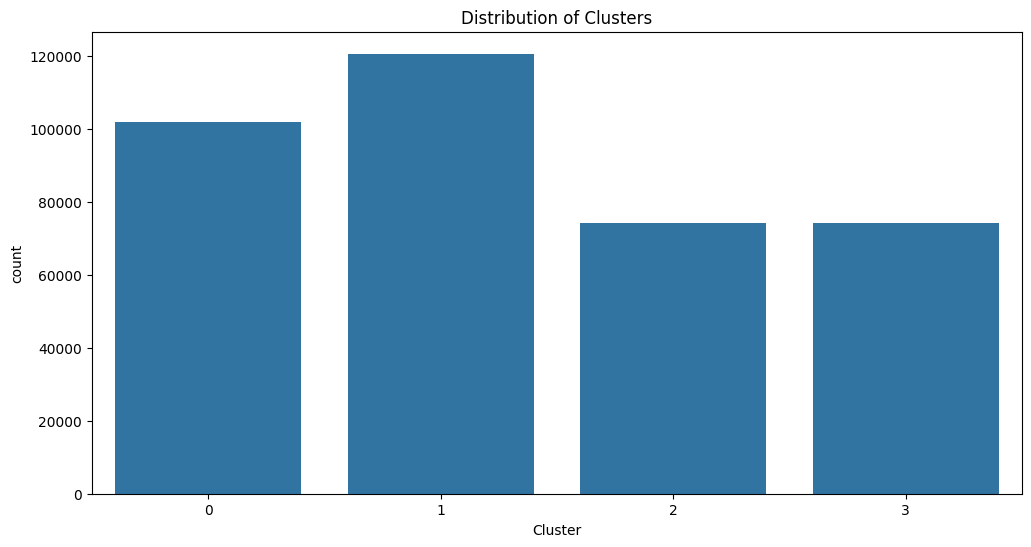

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Replace -8 with NaN for specified columns
columns_with_neg8 = [
    'Gender identity (4 categories) Code',
    'Economic activity status (10 categories) Code',
    'Marital and civil partnership status (7 categories) Code',
    'National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code',
    'Unpaid care (5 categories) Code',
    'Ethnic group (8 categories) Code'
]

# Replace -8 with NaN
df_cleaned[columns_with_neg8] = df_cleaned[columns_with_neg8].replace(-8, np.nan)

# Impute missing values with the median
df_cleaned[columns_with_neg8] = df_cleaned[columns_with_neg8].fillna(df_cleaned[columns_with_neg8].median())

# Select the columns for clustering (you can adjust which columns you want to include)
clustering_columns = [
    'Gender identity (4 categories) Code',
    'Economic activity status (10 categories) Code',
    'Marital and civil partnership status (7 categories) Code',
    'National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code',
    'Unpaid care (5 categories) Code',
    'Ethnic group (8 categories) Code'
]

# Extract the data for clustering
data_for_clustering = df_cleaned[clustering_columns]

# Standardize the data to bring all features to a similar scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the Elbow method
sse = []  # Sum of squared errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Choose the optimal number of clusters based on the Elbow plot
optimal_k = 4  # Adjust based on the Elbow plot

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
df_cleaned['Cluster'] = clusters

# Visualize the distribution of clusters
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', data=df_cleaned)
plt.title('Distribution of Clusters')
plt.show()


In [16]:
df_cleaned['Cluster'].unique()

array([1, 0, 3, 2], dtype=int32)

In [17]:
# Define a dictionary to map cluster numbers to descriptive labels
cluster_labels_dict = {
    0: "Inactive A",  # Placeholder label; change based on cluster characteristics
    1: "Inactive B",
    2: "Active C",
    3: "Active D"
}

# Map the cluster numbers to labels and create a new column
df_cleaned['Cluster_Label'] = df_cleaned['Cluster'].map(cluster_labels_dict)

# Display unique values in the new column to confirm the changes
print(df_cleaned['Cluster_Label'].unique())


['Inactive B' 'Inactive A' 'Active D' 'Active C']


Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

         1.0       0.49      0.30      0.37      7560
         2.0       0.49      0.68      0.57      7345
         3.0       0.50      0.13      0.20      7333
         4.0       0.49      0.24      0.33      7389
         5.0       0.50      1.00      0.67     14805
         6.0       0.49      0.46      0.48      7366
         7.0       0.49      0.15      0.23      7426
         8.0       0.49      0.49      0.49      7490
         9.0       0.49      0.49      0.49      7430

    accuracy                           0.49     74144
   macro avg       0.49      0.44      0.42     74144
weighted avg       0.49      0.49      0.45     74144



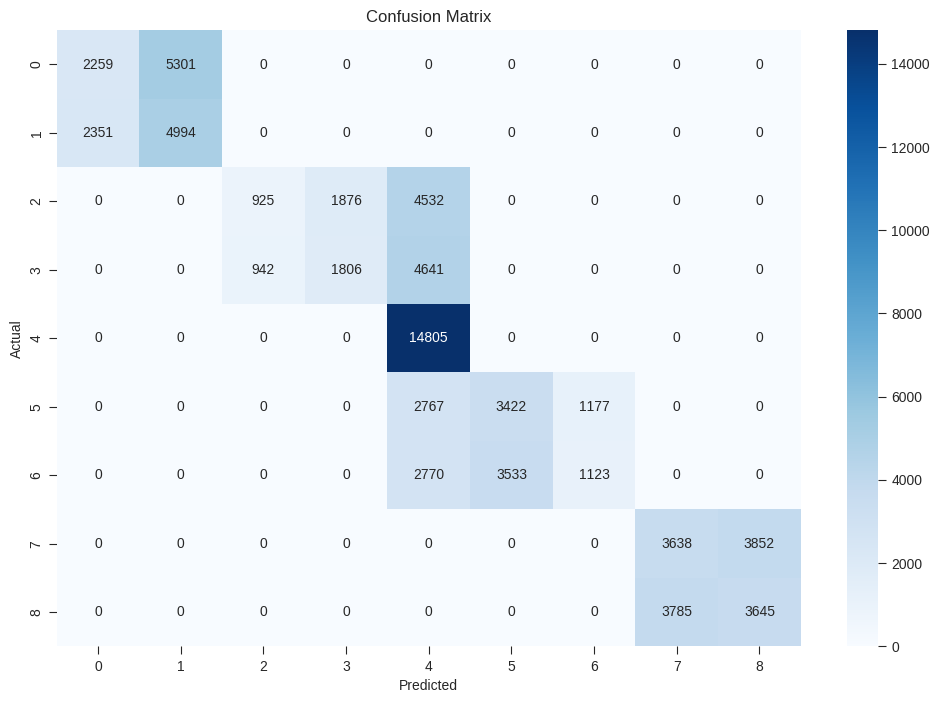

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your DataFrame and 'cluster_labels' are the results of your clustering
# Add the cluster labels to the DataFrame as a new feature
# df_cleaned['Cluster_lables'] = cluster_labels  # Assuming cluster_labels is the output from clustering

# Replace -8 with NaN and fill missing values as done previously
columns_with_neg8 = [
    'Gender identity (4 categories) Code',
    'Economic activity status (10 categories) Code',
    'Marital and civil partnership status (7 categories) Code',
    'National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code',
    'Unpaid care (5 categories) Code',
    'Ethnic group (8 categories) Code'
]

df_cleaned[columns_with_neg8] = df_cleaned[columns_with_neg8].replace(-8, np.nan)
df_cleaned[columns_with_neg8] = df_cleaned[columns_with_neg8].fillna(df_cleaned[columns_with_neg8].median())

# Define the target variable and features, including the cluster labels
target_column = 'National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'
feature_columns = [
    'Gender identity (4 categories) Code',
    # 'Economic activity status (10 categories) Code',
    # 'Marital and civil partnership status (7 categories) Code',
    # 'Unpaid care (5 categories) Code',
    'Ethnic group (8 categories) Code',
     'Cluster'  # Include the cluster label as a feature
]

# Extract features and target
X = df_cleaned[feature_columns]
y = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
################################### Another Way
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370720 entries, 0 to 2768607
Data columns (total 18 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   Lower tier local authorities                                                     370720 non-null  object 
 1   Gender identity (4 categories) Code                                              370720 non-null  float64
 2   Gender identity (4 categories)                                                   370720 non-null  object 
 3   Economic activity status (10 categories) Code                                    370720 non-null  float64
 4   Economic activity status (10 categories)                                         370720 non-null  object 
 5   Marital and civil partnership status (7 categories) Code                         370720 non-null  float64
 6   

Sillhoutte score of single link :  0.3222077909750405
Gaussian Naive Bayes model accuracy(in %): 75.0503524672709
R2 score with Ridge regression :  0.1857577912230668


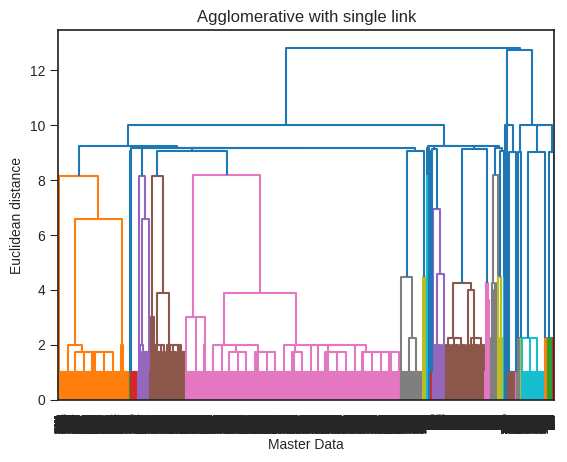

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score
data=pd.read_excel("/content/Master Dastaset.xlsx")


data["Type of central heating in household (3 categories) Code"]=data["Type of central heating in household (3 categories) Code"].fillna(data["Type of central heating in household (3 categories) Code"].median())
data["Unpaid care (5 categories) Code"]=data['Unpaid care (5 categories) Code'].fillna(data["Unpaid care (5 categories) Code"].median())

data=data.drop(['Lower tier local authorities','Lower tier local authorities Code','Gender identity (4 categories)','Economic activity status (10 categories)','Marital and civil partnership status (7 categories)','Type of central heating in household (3 categories)','Highest level of qualification (8 categories)','National Statistics Socio-economic Classification (NS-SeC) (10 categories)','Unpaid care (5 categories)'],axis=1)


from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric="euclidean",linkage="ward")
y_hc=hc.fit_predict(data)
data["Cluster"]=pd.DataFrame(hc.labels_)
print("Sillhoutte score of single link : ",silhouette_score(data,y_hc))




X=data.iloc[:,:-1]
y=data.iloc[:,-1]


from sklearn.decomposition import PCA


pca=PCA(n_components=2)
pca.fit(X)
X_new=pca.transform(X)
X_new=pd.DataFrame(X_new,columns=["PC1","PC2"])


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=None)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)



from sklearn import linear_model
Rideg=linear_model.Ridge(alpha=1)

Rideg.fit(X_train,y_train)
y_pred=Rideg.predict(X_test)
print("R2 score with Ridge regression : ",r2_score(y_test,y_pred))
LK=linkage(data,method="single")
dendrogram(LK)
plt.title("Agglomerative with single link")
plt.xlabel("Master Data")
plt.ylabel("Euclidean distance")
plt.show()


In [20]:
df_cleaned['predclass'] = df_cleaned['Economic activity status (10 categories)']

<ipython-input-21-317b9ea210c9>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


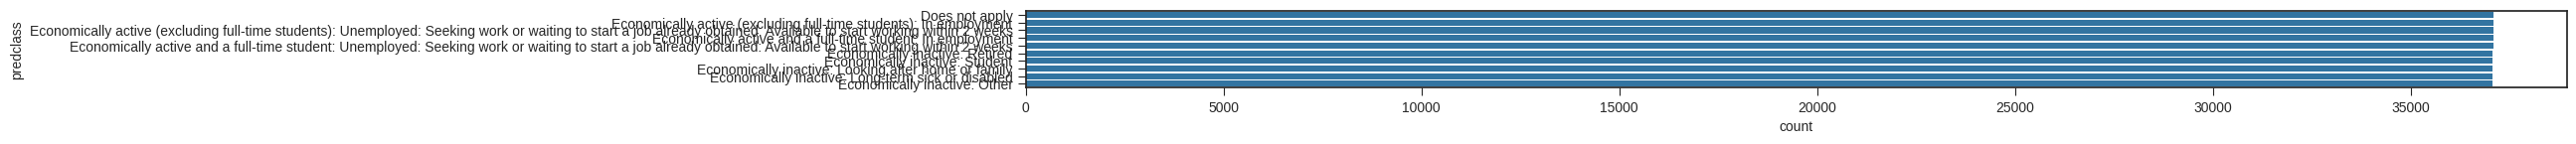

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=df_cleaned)
plt.show()

In [22]:
# Define the replacement dictionary for highest level of qualification categories
qualification_replacement = {

    'No qualifications': 'No Qual',
    'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills': 'L1',
    'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma': 'L2',
    'Apprenticeship': 'Apprenticeship',
    'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma': 'L3',
    'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA Higher Diploma, BTEC Higher level, professional qualifications (for example, teaching, nursing, accountancy)': 'L4',
    'Other: vocational or work-related qualifications, other qualifications achieved in England or Wales, qualifications achieved outside England or Wales (equivalent not stated or unknown)': 'Other'
}

# Replace the categories in the 'Highest level of qualification (8 categories)' column
df_cleaned['Highest level of qualification (8 categories)'] = df_cleaned['Highest level of qualification (8 categories)'].replace(qualification_replacement)

# Print the unique values after replacement
print(df_cleaned['Highest level of qualification (8 categories)'].unique())


['Does not apply' 'No Qual' 'L1' 'L2' 'Apprenticeship' 'L3' 'L4' 'Other']


<ipython-input-23-fef1aec96728>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


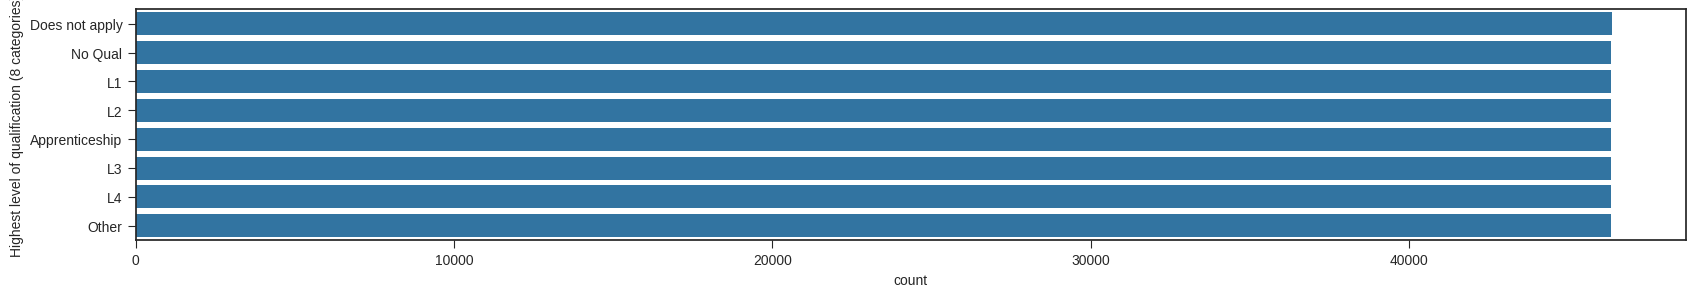

In [23]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="Highest level of qualification (8 categories)", data=df_cleaned)
plt.show()

In [24]:
# Define the replacement dictionary for Marital and Civil Partnership status categories
marital_status_replacement = {
    'Never married and never registered a civil partnership': 'Single',
    'Married': 'Married',
    'In a registered civil partnership': 'Married',
    'Separated, but still legally married or still legally in a civil partnership': 'Separated',
    'Divorced or formerly in a civil partnership which is now legally dissolved': 'Divorced',
    'Widowed or surviving partner from a civil partnership': 'Widowed'
}

# Replace the categories in the 'Marital and civil partnership status (7 categories)' column
df_cleaned['Marital and civil partnership status (7 categories)'] = df_cleaned['Marital and civil partnership status (7 categories)'].replace(marital_status_replacement)

# Print the unique values after replacement
print(df_cleaned['Marital and civil partnership status (7 categories)'].unique())


['Does not apply' 'Single' 'Married' 'Separated' 'Divorced' 'Widowed']


<ipython-input-25-9b823a0bf8c7>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<Axes: xlabel='count', ylabel='Marital and civil partnership status (7 categories)'>

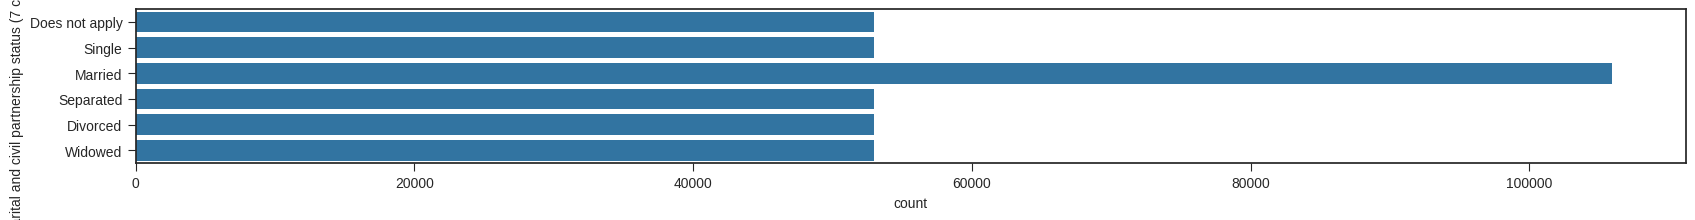

In [25]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="Marital and civil partnership status (7 categories)", data=df_cleaned)

In [26]:
# Define the replacement dictionary for NS-SeC categories
ns_sec_replacement = {
    'L1, L2 and L3: Higher managerial, administrative and professional occupations': 'Higher Managerial',
    'L4, L5 and L6: Lower managerial, administrative and professional occupations': 'Lower Managerial',
    'L7: Intermediate occupations': 'Intermediate',
    'L8 and L9: Small employers and own account workers': 'Small Employers',
    'L10 and L11: Lower supervisory and technical occupations': 'Lower Supervisory',
    'L12: Semi-routine occupations': 'Semi-Routine',
    'L13: Routine occupations': 'Routine',
    'L14.1 and L14.2: Never worked and long-term unemployed': 'Unemployed',
    'L15: Full-time students': 'Students'
}

# Replace the categories in the 'National Statistics Socio-economic Classification (NS-SeC) (10 categories)' column
df_cleaned['National Statistics Socio-economic Classification (NS-SeC) (10 categories)'] = df_cleaned[
    'National Statistics Socio-economic Classification (NS-SeC) (10 categories)'].replace(ns_sec_replacement)

# Print the unique values after replacement
print(df_cleaned['National Statistics Socio-economic Classification (NS-SeC) (10 categories)'].unique())


['Does not apply' 'Higher Managerial' 'Lower Managerial' 'Intermediate'
 'Small Employers' 'Lower Supervisory' 'Semi-Routine' 'Routine'
 'Unemployed' 'Students']


<ipython-input-27-73afb675b6de>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<Axes: xlabel='count', ylabel='National Statistics Socio-economic Classification (NS-SeC) (10 categories)'>

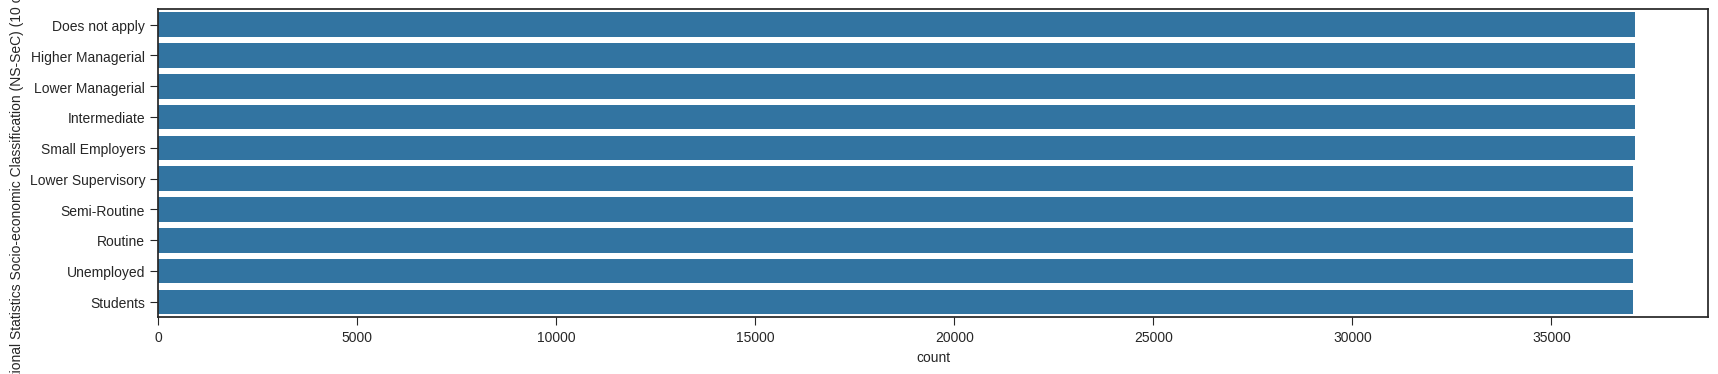

In [27]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y="National Statistics Socio-economic Classification (NS-SeC) (10 categories)", data=df_cleaned)

In [28]:
# Define the replacement dictionary
replacement_dict = {
    'Economically active (excluding full-time students): In employment': 'Employed',
    'Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks': 'Unemployed',
    'Economically active and a full-time student: In employment': 'Student Employed',
    'Economically active and a full-time student: Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks': 'Unemployed',
    'Economically inactive: Retired': 'Retired',
    'Economically inactive: Student': 'Inactive',
    'Economically inactive: Other': 'Inactive',
    'Economically inactive: Looking after home or family': 'Inactive',
    'Economically inactive: Long-term sick or disabled': 'Inactive'
}

# Replace the categories in the 'Economic activity status (10 categories)' column
df_cleaned['Economic activity status (10 categories)'] = df_cleaned['Economic activity status (10 categories)'].replace(replacement_dict)

# Verify the changes
print(df_cleaned['Economic activity status (10 categories)'].unique())

['Does not apply' 'Employed' 'Unemployed' 'Student Employed' 'Retired'
 'Inactive']


<ipython-input-29-5caeebd1290b>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<Axes: xlabel='count', ylabel='Economic activity status (10 categories)'>

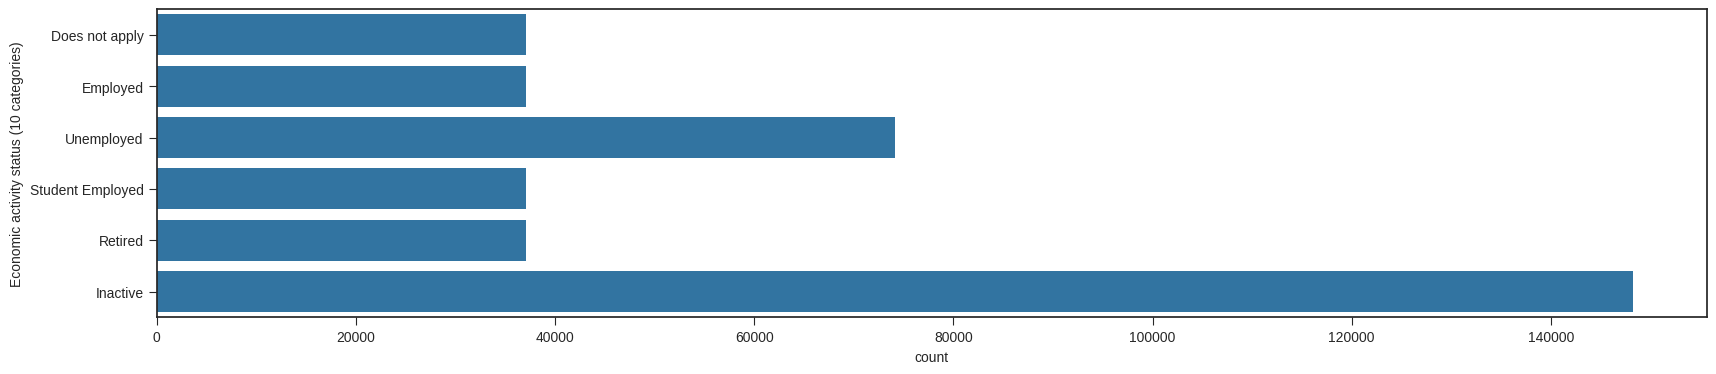

In [29]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y="Economic activity status (10 categories)", data=df_cleaned)